In [11]:
#Note Remove This Line to Get the Figure in Seperate Window\n",
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools
from math import sqrt,pow
np.random.seed(4)


In [4]:
class AllNeeded:
    def __init__(self,value):
        self.f11=float(value[0])
        self.f10=float(value[1])
        self.f01=float(value[2])
        self.f00=float(value[3])
        self.f1plus= self.f11+self.f10
        self.f0plus= self.f01+self.f00
        self.fplus1= self.f11+self.f01
        self.fplus0=self.f10+self.f00
        self.N =float(sum(value))
        self.all_confidence = min(self.f11/self.f1plus,self.f11/self.fplus1)
        self.kappa = (self.N*self.f11+ self.N*self.f00-self.f1plus*self.fplus1-self.f0plus*self.fplus0)/(pow(self.N,2)-self.f1plus*self.fplus1-self.f0plus*self.fplus0)
        self.interest =(self.N*self.f11)/(self.f1plus*self.fplus1)
        self.cosine= (self.f11)/(sqrt(self.f1plus*self.fplus1))
        self.Jaccard = self.f11/(self.f1plus+self.fplus1-self.f11)
        #Upgrade for Question Three (5 more measurements )
        self.laplace = (self.f11+1)/(self.f1plus+2)
        self.conviction = (self.f1plus*self.fplus0)/self.isZero(self.N*self.f10)
        self.certinfactor=(self.f11/self.N - self.fplus1/self.N)/(1-(self.fplus1/self.N))
    
    def isZero(self,value):
        return 1 if value==0 else value
    def __str__(self):
        return 'f11:{},f10:{},f01:{},f00:{},f1+:{},f0+:{},f+1:{},f+0:{}'.format(self.f11,self.f10,self.f01,
                                                                        self.f00,self.f1plus,self.f0plus,
                                                                        self.fplus1,self.fplus0)
        
        

To generate 4 numbers sum to 10000 I used 
#Create the array
    #result =np.random.dirichlet(np.ones(4),size=1)
#multilply with 10,000 (so The sum is 10,000)
    #result = result *10000
#Convert the array to type int
    result =np.array( result,dtype=int)
# add 2 to one of the array elements to recover the loset precesion
    result[0,np.random.randint(4)]+=2
    

In [5]:
lst = []
total =np.array(np.random.dirichlet(np.ones(4),size=10000)*10000,dtype=int)
for result in total:
    result[np.random.randint(4,size=1)]+=(10000-np.sum(result))
    lst.append(AllNeeded(result))

In [6]:
allconf = sorted(lst,key=lambda x:x.all_confidence,reverse=True)[:10]
print '=========All Confidence=============='
for element in allconf:
    print element,',all_confidence :',element.all_confidence

print '========= kappa =============='
allconf = sorted(lst,key=lambda x:x.kappa,reverse=True)[:10]
for element in allconf:
    print element,',kappa :',element.kappa
print '========= interest =============='
allconf = sorted(lst,key=lambda x:x.interest,reverse=True)[:10]
for element in allconf:
    print element,',interest :',element.interest
print '========= cosine =============='
allconf = sorted(lst,key=lambda x:x.cosine,reverse=True)[:10]
for element in allconf:
    print element,',cosine :',element.cosine
print '========= Jaccard =============='
allconf = sorted(lst,key=lambda x:x.Jaccard,reverse=True)[:10]
for element in allconf:
    print element,',Jaccard :',element.Jaccard


=========All Confidence==============
f11:9726.0,f10:15.0,f01:26.0,f00:233.0,f1+:9741.0,f0+:259.0,f+1:9752.0,f+0:248.0 ,all_confidence : 0.99733388023
f11:8966.0,f10:51.0,f01:38.0,f00:945.0,f1+:9017.0,f0+:983.0,f+1:9004.0,f+0:996.0 ,all_confidence : 0.994344016857
f11:8078.0,f10:52.0,f01:39.0,f00:1831.0,f1+:8130.0,f0+:1870.0,f+1:8117.0,f+0:1883.0 ,all_confidence : 0.993603936039
f11:5919.0,f10:43.0,f01:23.0,f00:4015.0,f1+:5962.0,f0+:4038.0,f+1:5942.0,f+0:4058.0 ,all_confidence : 0.992787655149
f11:8589.0,f10:56.0,f01:73.0,f00:1282.0,f1+:8645.0,f0+:1355.0,f+1:8662.0,f+0:1338.0 ,all_confidence : 0.99157238513
f11:8738.0,f10:7.0,f01:79.0,f00:1176.0,f1+:8745.0,f0+:1255.0,f+1:8817.0,f+0:1183.0 ,all_confidence : 0.991040036294
f11:6254.0,f10:68.0,f01:62.0,f00:3616.0,f1+:6322.0,f0+:3678.0,f+1:6316.0,f+0:3684.0 ,all_confidence : 0.989243910155
f11:8116.0,f10:92.0,f01:36.0,f00:1756.0,f1+:8208.0,f0+:1792.0,f+1:8152.0,f+0:1848.0 ,all_confidence : 0.988791423002
f11:5230.0,f10:67.0,f01:6.0,f00:469

In [7]:
x = range(1000)


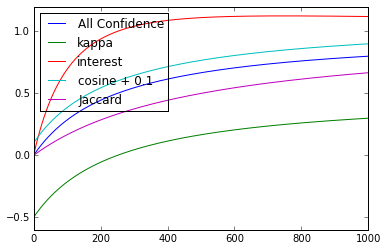

In [12]:
labels = []
plotHandles = []
y1 = [AllNeeded((i,250,250,250)) for i in x]
#for i in range(1, num_plots + 1):
t, = plt.plot(x, [y.all_confidence for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('All Confidence')
t, = plt.plot(x, [y.kappa for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('kappa')
t, = plt.plot(x, [y.interest for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('interest')
t, = plt.plot(x, [y.cosine+0.1 for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('cosine + 0.1')
t, = plt.plot(x, [y.Jaccard for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('Jaccard')
plt.legend(plotHandles, labels, 'upper left',loc=1)
plt.show()



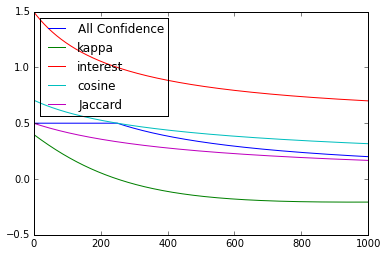

In [13]:
labels = []
plotHandles = []
y1 = [AllNeeded((250,i,250,250)) for i in x]
#for i in range(1, num_plots + 1):
t, = plt.plot(x, [y.all_confidence for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('All Confidence')
t, = plt.plot(x, [y.kappa for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('kappa')
t, = plt.plot(x, [y.interest for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('interest')
t, = plt.plot(x, [y.cosine for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('cosine')
t, = plt.plot(x, [y.Jaccard for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('Jaccard')
plt.legend(plotHandles, labels, 'upper left',loc=1)
plt.show()

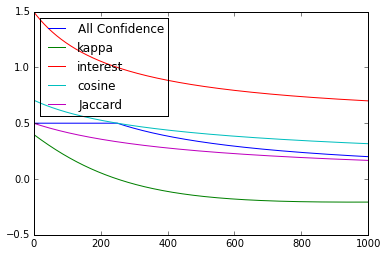

In [14]:
labels = []
plotHandles = []
y1 = [AllNeeded((250,250,i,250)) for i in x]
#for i in range(1, num_plots + 1):
t, = plt.plot(x, [y.all_confidence for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('All Confidence')
t, = plt.plot(x, [y.kappa for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('kappa')
t, = plt.plot(x, [y.interest for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('interest')
t, = plt.plot(x, [y.cosine for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('cosine')
t, = plt.plot(x, [y.Jaccard for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('Jaccard')
plt.legend(plotHandles, labels, 'upper left',loc=1)
plt.show()

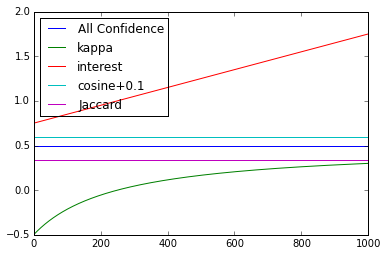

In [15]:
labels = []
plotHandles = []
y1 = [AllNeeded((250,250,250,i)) for i in x]
#for i in range(1, num_plots + 1):
t, = plt.plot(x, [y.all_confidence for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('All Confidence')
t, = plt.plot(x, [y.kappa for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('kappa')
t, = plt.plot(x, [y.interest for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('interest')
t, = plt.plot(x, [y.cosine+0.1 for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('cosine+0.1')
t, = plt.plot(x, [y.Jaccard for y in y1]) #need the ',' per ** below
plotHandles.append(t)
labels.append('Jaccard')
plt.legend(plotHandles, labels, 'upper left',loc=1)
plt.show()